# Neural Network Implementation

## Setup Libraries

In [273]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data split
from sklearn.model_selection import train_test_split

## Load and Prepare Dataset

In [274]:
df = pd.read_csv('bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [275]:
X = df.drop('Activity', axis=1).to_numpy()
y = df[['Activity']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [276]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2813, 1776), (938, 1776), (2813, 1), (938, 1))

In [277]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [278]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1776, 2813), (1776, 938), (1, 2813), (1, 938))

## Neural Network

### Sigmoid

In [279]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

### Initialize Parameters

In [280]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

### Forward and Backward Propagation

In [281]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Optimization

In [282]:
# optimize

def gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)        
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [309]:
def SGD(w, b, X, Y, epoch, learning_rate, verbose=False):

    costs = []

    for i in range(epoch):

        # minibatch
        for j in range(X.shape[1]):

            # get single sample
            point_x = X[:, j]
            point_x = point_x.reshape(point_x.shape[0], 1)
            point_y = Y[:, j]
            
            # calculate gradient and cost function
            grads, cost = propagate(w, b, point_x, point_y)
            dw, db = grads["dw"], grads["db"]

            # update
            w -= learning_rate * dw
            b -= learning_rate * db

        _, cost = propagate(w, b, X, Y)
        # record the costs
        if i % 100 == 0:
            costs.append(cost)

        # print the cost every 100 training iterations
        if verbose and i % 100 == 0:
            print('Cost after iteration %i: %f' % (i, cost))
        
    params = {"w": w,
                "b": b}

    grads = {"dw": dw,
                "db": db}

    return params, grads, costs

In [289]:
def Adam(w, b, X, Y, epoch, learning_rate, verbose=False, beta1=0.9, beta2=0.999, constant=1e-8):
    
    costs = []
    vdw, vdb = 0, 0     # moment
    sdw, sdb = 0, 0     # rmsprop
    iter = 1

    for e in range(epoch):        

        # calculate gradient and cost function
        grads, cost = propagate(w, b, X, Y)
        dw, db = grads["dw"], grads["db"]

        # moment
        vdw = (beta1 * vdw) + ((1 - beta1) * dw)
        vdb = (beta1 * vdb) + ((1 - beta1) * db)

        # rmsprop
        sdw = (beta2 * sdw) + ((1 - beta2) * (dw ** 2))
        sdb = (beta2 * sdb) + ((1 - beta2) * (db ** 2))

        # corrected
        vdw_corr = vdw / (1 - beta1 ** iter)
        vdb_corr = vdb / (1 - beta1 ** iter)
        sdw_corr = sdw / (1 - beta2 ** iter)
        sdb_corr = sdb / (1 - beta2 ** iter)

        # update weight
        w -= learning_rate * vdw_corr / (np.sqrt(sdw_corr) + constant)
        b -= learning_rate * vdb_corr / (np.sqrt(sdb_corr) + constant)

        # record the cost
        if e % 100 == 0:
            costs.append(cost)

        # print the cost every 100 training iterations
        if verbose and e % 100 == 0:
            print ("Cost after iteration %i: %f" %(e, cost))

        iter += 1

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs
        

### Prediction

In [285]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

### Merge into a Model

In [286]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, optimizer='GD', print_cost=False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # optimizer
    assert optimizer != None
    if optimizer == 'GD':
        # Gradient descent
        parameters, grads, costs = gradient_descent(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif optimizer == 'SGD':
        parameters, grads, costs = SGD(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif optimizer == 'Adam':
        parameters, grads, costs = Adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)    
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Train Model

In [287]:
# Gradient Descent
d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.681095
Cost after iteration 200: 0.673994
Cost after iteration 300: 0.667662
Cost after iteration 400: 0.661794
Cost after iteration 500: 0.656314
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.646329
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.637419
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.629386
Cost after iteration 1200: 0.625651
Cost after iteration 1300: 0.622084
Cost after iteration 1400: 0.618672
Cost after iteration 1500: 0.615404
Cost after iteration 1600: 0.612268
Cost after iteration 1700: 0.609257
Cost after iteration 1800: 0.606360
Cost after iteration 1900: 0.603572
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


In [297]:
# SGD
d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, optimizer='SGD', print_cost=True)

Cost after iteration 0: 0.780551
Cost after iteration 100: 0.685128
Cost after iteration 200: 0.596421
Cost after iteration 300: 0.573102
Cost after iteration 400: 0.564493
Cost after iteration 500: 0.560631
Cost after iteration 600: 0.558637
Cost after iteration 700: 0.557473
Cost after iteration 800: 0.556687
Cost after iteration 900: 0.556041
Cost after iteration 1000: 0.555404
Cost after iteration 1100: 0.554712
Cost after iteration 1200: 0.553942
Cost after iteration 1300: 0.553095
Cost after iteration 1400: 0.552180
Cost after iteration 1500: 0.551215
Cost after iteration 1600: 0.550214
Cost after iteration 1700: 0.549191
Cost after iteration 1800: 0.548156
Cost after iteration 1900: 0.547116
train accuracy: 90.97049413437611 %
test accuracy: 75.69296375266525 %


In [298]:
# Adam
d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, optimizer='Adam', print_cost=True)

train accuracy: 87.8066121578386 %
test accuracy: 76.43923240938166 %


## Perform Comparison on Different Optimization Algorithm
Here we will use several learning rate as follows:
- 1e-3
- 1e-4
- 1e-5
- 1e-6
- 1e-7

### Learning Rate = 0.001

In [312]:
# learning rate
lr = 1e-3

print('Gradient Descent')
gd_1e3 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
print('-' * 50)
print('Stochastic Gradient Descent')
sgd_1e3 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='SGD', print_cost=False)
print('-' * 50)
print('Adam')
adam_1e3 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %
--------------------------------------------------
Stochastic Gradient Descent
train accuracy: 90.97049413437611 %
test accuracy: 75.69296375266525 %
--------------------------------------------------
Adam
train accuracy: 87.8066121578386 %
test accuracy: 76.43923240938166 %


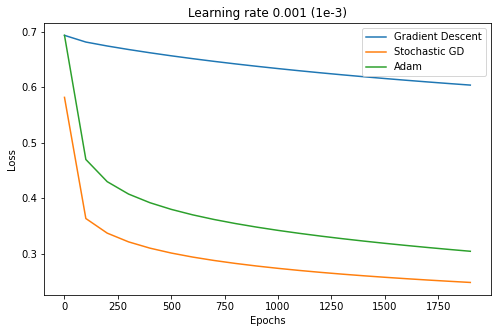

In [313]:
range_iter = np.arange(gd_1e3['num_iterations'], step=100)

plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_1e3['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_1e3['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_1e3['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.001 (1e-3)')
plt.legend()
plt.show()

### Learning Rate = 0.0001

In [314]:
# learning rate
lr = 1e-4

print('Gradient Descent')
gd_1e4 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
print('-' * 50)
print('Stochastic Gradient Descent')
sgd_1e4 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='SGD', print_cost=False)
print('-' * 50)
print('Adam')
adam_1e4 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 57.625311055812304 %
test accuracy: 60.66098081023454 %
--------------------------------------------------
Stochastic Gradient Descent
train accuracy: 85.92250266619267 %
test accuracy: 75.79957356076758 %
--------------------------------------------------
Adam
train accuracy: 79.2036971205119 %
test accuracy: 74.09381663113007 %


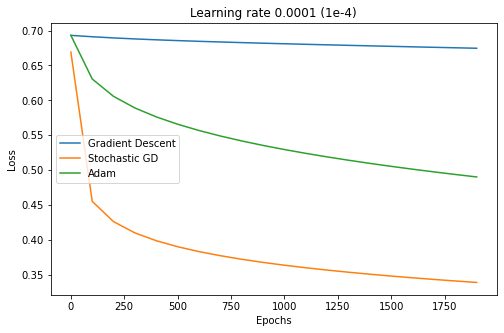

In [315]:
range_iter = np.arange(gd_1e3['num_iterations'], step=100)

plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_1e4['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_1e4['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_1e4['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.0001 (1e-4)')
plt.legend()
plt.show()

### Learning Rate = 0.00001

In [310]:
# learning rate
lr = 1e-5

print('Gradient Descent')
gd_1e5 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
print('-' * 50)
print('Stochastic Gradient Descent')
sgd_1e5 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='SGD', print_cost=False)
print('-' * 50)
print('Adam')
adam_1e5 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
--------------------------------------------------
Stochastic Gradient Descent
train accuracy: 80.87451119800924 %
test accuracy: 76.97228144989339 %
--------------------------------------------------
Adam
train accuracy: 66.79701386420192 %
test accuracy: 67.59061833688699 %


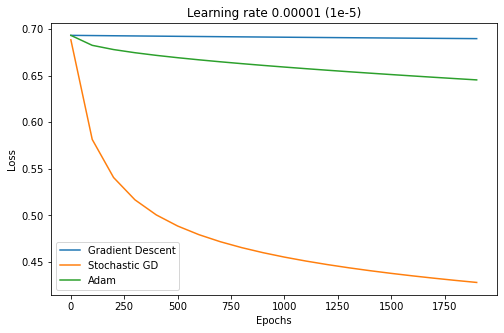

In [311]:
plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_1e5['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_1e5['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_1e5['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.00001 (1e-5)')
plt.legend()
plt.show()

### Learning Rate = 0.000001

In [316]:
# learning rate
lr = 1e-6

print('Gradient Descent')
gd_1e6 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
print('-' * 50)
print('Stochastic Gradient Descent')
sgd_1e6 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='SGD', print_cost=False)
print('-' * 50)
print('Adam')
adam_1e6 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
--------------------------------------------------
Stochastic Gradient Descent
train accuracy: 75.43547813722004 %
test accuracy: 73.66737739872069 %
--------------------------------------------------
Adam
train accuracy: 53.32385353714895 %
test accuracy: 57.142857142857146 %


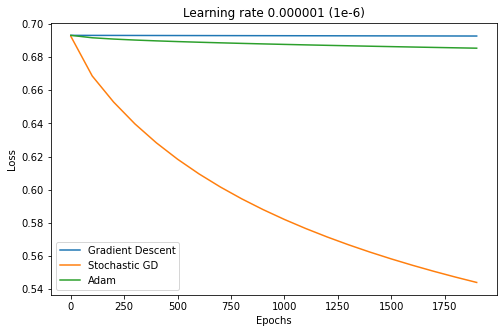

In [317]:
plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_1e6['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_1e6['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_1e6['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.000001 (1e-6)')
plt.legend()
plt.show()